In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/manutej/course_datasets/main/diabetes.csv')
df['Diagnosis'] = df['Outcome'].map({1: 'Yes', 0: 'No'})
df.drop(columns = 'Outcome',inplace=True)       #or df.drop(columns = ['Outcome'],inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes


#Understanding the Data

The `diabetes.csv` dataset contains 768 entries and 9 columns. The features include:

`Pregnancies`: Number of times pregnant

`Glucose`: Plasma glucose concentration

`BloodPressure`: Diastolic blood pressure

`SkinThickness`: Triceps skin fold thickness

`Insulin`: 2-Hour serum insulin

`BMI`: Body mass index

`DiabetesPedigreeFunction`: Diabetes pedigree function

`Age`: Age in years

`Outcome`: Class label (1: tested positive for diabetes, 0: tested negative for diabetes)

#Data Preparation: Clean and prepare data
Handling missing data

In [119]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diagnosis                   0
dtype: int64

#EDA

Per the Center for Disease Control and Prevention (CDC):
  - The blood sugar target is 140 mg/dL or lower. If your level is higher than 140 mg/dL, you'll need to take a glucose tolerance test.
  -  A healthy blood pressure is 120/80 mmHg; systolic pressure, or the top number, is less than 120, and your diastolic pressure, or the bottom number, is less than 80.
  - If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range. If your BMI is 25.0 to 29.9, it falls within the overweight range. If your BMI is 30.0 or higher, it falls within the obese range.

Definition: The 'DiabetesPedigreeFunction' is a function that scores the probability of diabetes based on family history, with a realistic range of 0.08 to 2.42. Age has a realistic range from 21 to 81. The Outcome, in the target variable, 0 represents healthy people, and 1 represents those with diabetes.

### Histograms: The Selfies of Data!

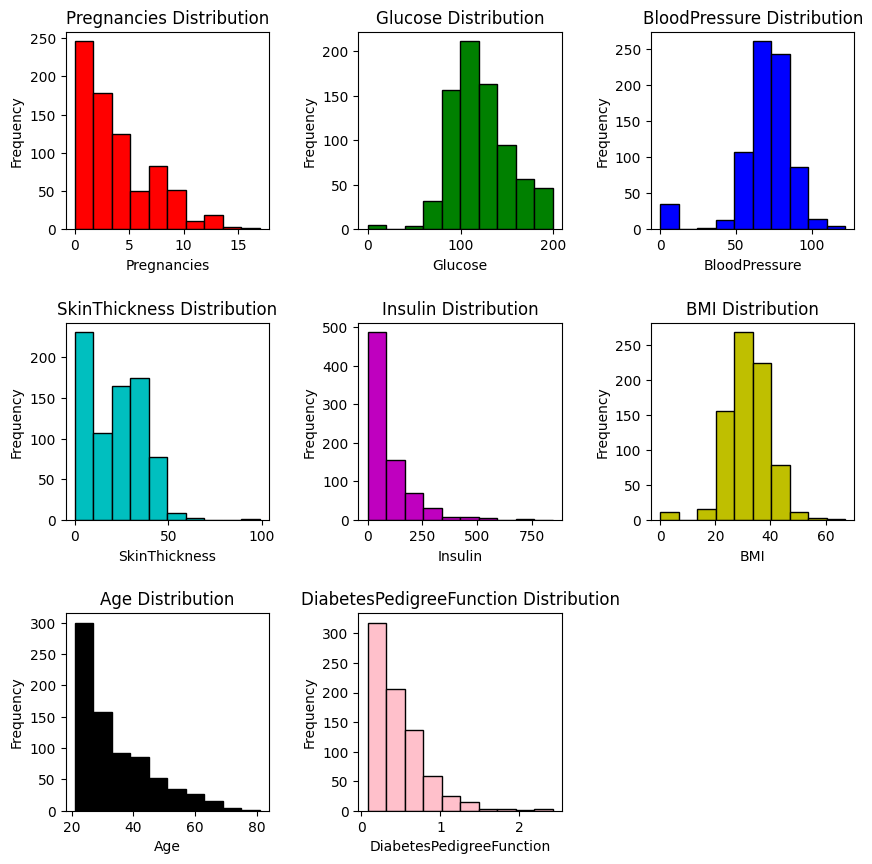

In [120]:
# List of features to be plotted and corresponding colors
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'pink']

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(9, 9))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through features and plot histograms on subplots
for i, feature in enumerate(features):
    axes[i].hist(df[feature], color=colors[i], edgecolor='black')
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove extra empty subplots
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(pad=2)
plt.show()

### The Box Plot Detective 🕵️

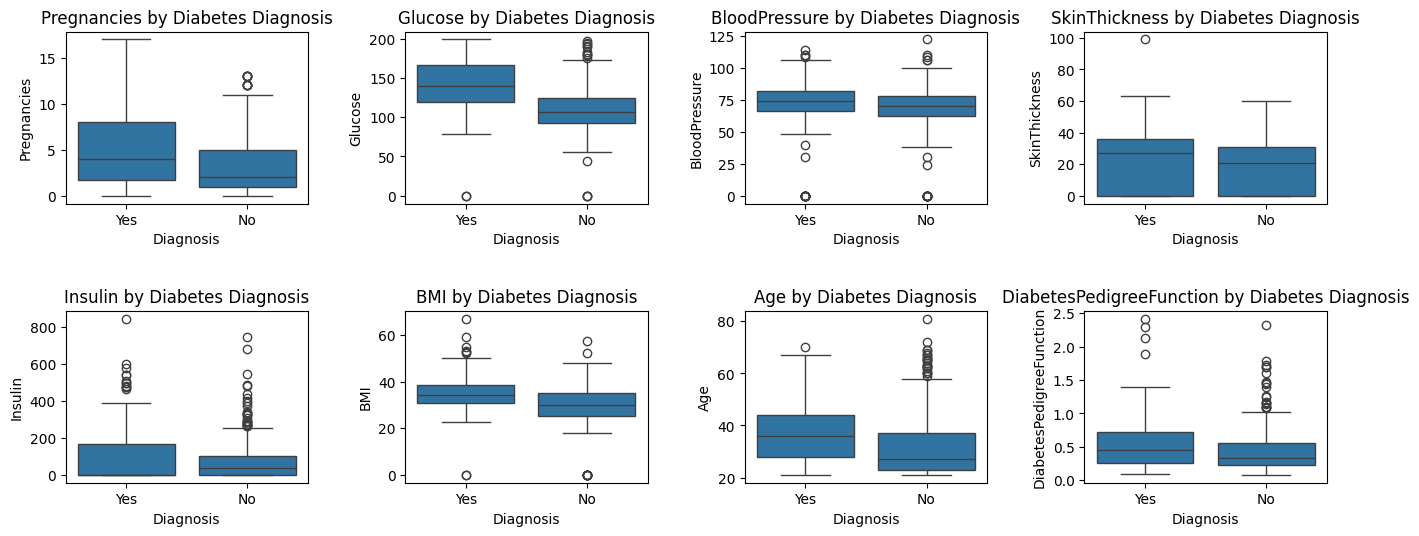

In [122]:
#Using a for loop to display all the boxplots

# features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through features and plot box plots on subplots
for i, feature in enumerate(features):
    sns.boxplot(x='Diagnosis', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} by Diabetes Diagnosis')

# Remove extra empty subplots
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(pad=3)
plt.show()


#Feature Engineering

Log transformations, square root transformations, or even polynomial transformations can help in stabilizing variance and making the data more "normal" - or amenable to our Machine Learning models.

The original data relationship is still there, but we are using a mathematical trick in order to be able to create a better-fitting model.

🔄 **A. Feature Transformation:**

<Axes: >

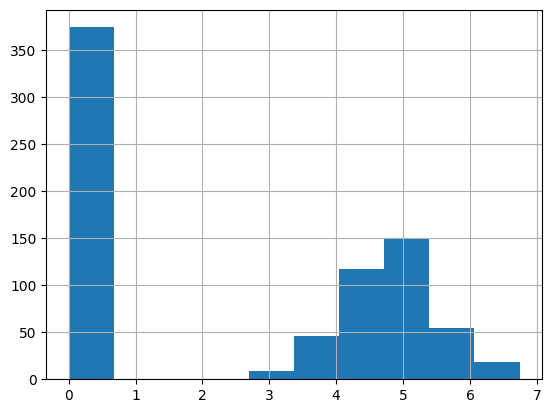

In [123]:
import numpy as np

df['Log_Insulin'] = np.log(df['Insulin'] + 1)
df['Log_Insulin'].hist()

**B. Handling Categorical Data**

Handling Categorical Data: Converting categories to a format a model can understand.

The original table had a column named Outcome with values of 0s and 1s.
We created a column named Diagnosis in the image of the Outcome and change the 0s into No and 1s into Yes. column and drop the Outcome column.

So, here we're going to change back the Yes into 1 and No into 0.


In [124]:
print("Before we had:")
print(df['Diagnosis'].value_counts())
df['Diagnosis'] = df['Diagnosis'].map({'Yes': 1, 'No': 0})
print( '')
print("Now we have: ")
print(df['Diagnosis'].value_counts())

Before we had:
Diagnosis
No     500
Yes    268
Name: count, dtype: int64

Now we have: 
Diagnosis
0    500
1    268
Name: count, dtype: int64


**C. Feature creation**

Feature creation: Creating new variables which will be most helpful for our model.

Multiply age by BMI, and you might capture the compounding risk that comes with both getting older and having a higher or lower BMI.

In [125]:
# BMI multiplied by Age
df['BMIAgeProduct'] = df['BMI'] * df['Age']
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis,Log_Insulin,BMIAgeProduct
0,6,148,72,35,0,33.6,0.627,50,1,0.000000,1680.0
1,1,85,66,29,0,26.6,0.351,31,0,0.000000,824.6
2,8,183,64,0,0,23.3,0.672,32,1,0.000000,745.6
3,1,89,66,23,94,28.1,0.167,21,0,4.553877,590.1
4,0,137,40,35,168,43.1,2.288,33,1,5.129899,1422.3


🌡️ Blood Pressure per Age (BPA): The Pressure Cooker 🍲

Dividing Blood Pressure by Age can shed light on how this relationship changes as one ages.

In [126]:
# Blood Pressure divided by Age
df['BPA'] = df['BloodPressure'] / df['Age']
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis,Log_Insulin,BMIAgeProduct,BPA
0,6,148,72,35,0,33.6,0.627,50,1,0.000000,1680.0,1.440000
1,1,85,66,29,0,26.6,0.351,31,0,0.000000,824.6,2.129032
2,8,183,64,0,0,23.3,0.672,32,1,0.000000,745.6,2.000000
3,1,89,66,23,94,28.1,0.167,21,0,4.553877,590.1,3.142857
4,0,137,40,35,168,43.1,2.288,33,1,5.129899,1422.3,1.212121


**D. Feature scaling**

Feature scaling: Making sure all features are on the same scale.

Feature scaling is the process of normalizing the range of features in a dataset. It is a data preprocessing technique used to transform the values of features or variables in a dataset to a similar scale

Real-world datasets often contain features that are varying in degrees of magnitude, range, and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

Before we scale, we'll want to make sure we don't have infinite values of null values:

In [127]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diagnosis                   0
Log_Insulin                 0
BMIAgeProduct               0
BPA                         0
dtype: int64

In [128]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis,Log_Insulin,BMIAgeProduct,BPA
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,2.471968,1066.817578,2.259629
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,2.460253,452.376188,0.846735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000,739.200000,1.734354
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,3.448852,986.000000,2.312500
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,4.853976,1350.975000,2.821970
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,6.741701,2697.000000,4.571429


In [131]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis,Log_Insulin,BMIAgeProduct,BPA
0,6,148,72,35,0,33.6,0.627,50,1,0.000000,1680.0,1.440000
1,1,85,66,29,0,26.6,0.351,31,0,0.000000,824.6,2.129032
2,8,183,64,0,0,23.3,0.672,32,1,0.000000,745.6,2.000000
3,1,89,66,23,94,28.1,0.167,21,0,4.553877,590.1,3.142857
4,0,137,40,35,168,43.1,2.288,33,1,5.129899,1422.3,1.212121


#**StandardScaler**

**Data Standardization**

Before feeding data into a machine learning model, it's crucial to preprocess and engineer the features effectively. Doing so can significantly improve the model's performance and reliability. So below, we're implementing the technique of Feature Scaling to transform all the features in the dataset to the same scale.

Standard Scaler helps to get standardized distribution, with a zero mean and standard deviation of one (unit variance). It standardizes features by subtracting the mean value from the feature and then dividing the result by feature standard deviation.

The standard scaling is calculated as:

`z = (x - u) / s`

Where,

 `z is the scaled data`

 `x is the data`

 `u is the mean of the training samples`

 `s is the standard deviation of the training samples`

In [141]:
# Normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)

scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis,Log_Insulin,BMIAgeProduct,BPA
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896,-1.005417,1.356353,-0.968619
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120,-1.005417,-0.535783,-0.154336
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896,-1.005417,-0.710530,-0.306823
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120,0.846769,-1.054495,1.043779
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896,1.081052,0.786324,-1.237920


Below, we can see that the means are equal to 0 and the stds are equal to 1.

In [135]:
scaled_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis,Log_Insulin,BMIAgeProduct,BPA
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16,7.401487e-17,-1.549686e-16,9.598803e-17,-4.475587e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00,-7.321202e-01,-1.005417e+00,-2.359790e+00,-2.670377e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01,-7.321202e-01,-1.005417e+00,-7.246869e-01,-6.207581e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01,-7.321202e-01,3.973253e-01,-1.787677e-01,6.248182e-02
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01,1.365896e+00,9.688271e-01,6.285534e-01,6.645614e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00,1.365896e+00,1.736616e+00,3.605947e+00,2.732031e+00


#**MinMaxScaler**

**Data Normalization**

There is another way of data scaling, where the minimum of feature is made equal to zero and the maximum of feature equal to one. MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.

In [140]:
# Normalized data
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
minmax_features = minmax_scaler.fit_transform(df)
minmax_df = pd.DataFrame(minmax_features, columns= df.columns)
minmax_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis,Log_Insulin,BMIAgeProduct,BPA
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0,0.000000,0.622914,0.315000
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0,0.000000,0.305747,0.465726
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0,0.000000,0.276455,0.437500
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0,0.675479,0.218799,0.687500
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0,0.760921,0.527364,0.265152


Below, we can see that the minima are equal to 0 and the maxima are equal to 1.

In [136]:
minmax_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis,Log_Insulin,BMIAgeProduct,BPA
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958,0.366668,0.395557,0.494294
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951,0.364931,0.167733,0.185223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000,0.000000,0.274082,0.379390
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000,0.511570,0.365591,0.505859
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000,0.719993,0.500918,0.617306
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
